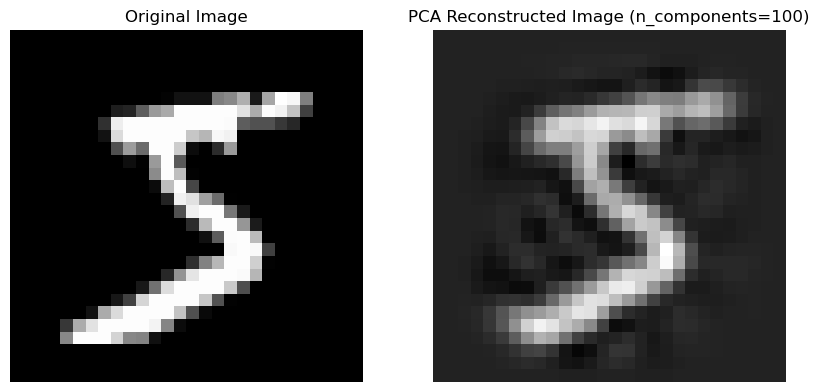

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from partition import balanced_dirichlet_partition, MNISTDataset
from pca import PCADigitReducer
from model import ClassificationModel

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_flattened = x_train.reshape(x_train.shape[0], -1)

In [7]:
pca_reducer = PCADigitReducer(n_components=100)
x_train_reduced = pca_reducer.fit_transform(x_train_flattened)

x_train_reduced_reshaped = x_train_reduced.reshape(x_train_reduced.shape[0], 10, 10, 1)

In [9]:
partitions_number = 10
alpha = 0.5
seed = 42
dataset = MNISTDataset(x_train_flattened, y_train)
net_dataidx_map = balanced_dirichlet_partition(dataset, partitions_number=partitions_number, alpha=alpha, seed=seed)

In [11]:
results = {
    "original": [],
    "pca": []
}

for partition_index, data_indices in net_dataidx_map.items():
    x_train_partition = x_train_flattened[data_indices]
    y_train_partition = y_train[data_indices]
    
    x_train_partition_reshaped = x_train_partition.reshape(x_train_partition.shape[0], 28, 28, 1)  # Reshape for original images
    
    model = ClassificationModel(input_shape=(28, 28, 1), x_train=x_train_partition_reshaped, y_train=to_categorical(y_train_partition, 10))
    model.build_model()
    model.compile_model()
    
    model.train_model(epochs=12, batch_size=64)
    
    loss, accuracy = model.model.evaluate(x_train_partition_reshaped, to_categorical(y_train_partition, 10), verbose=0)
    results["original"].append((partition_index, loss, accuracy))
    print(f"Partition {partition_index} (Original): Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/12


C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.0877 - loss: 3.0423
Epoch 2/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0969 - loss: 2.8373
Epoch 3/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.0926 - loss: 2.6835
Epoch 4/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.1182 - loss: 2.5323
Epoch 5/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.1214 - loss: 2.4334
Epoch 6/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.1493 - loss: 2.3374
Epoch 7/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.1722 - loss: 2.2361
Epoch 8/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2062 - loss: 2.1860
Epoch 9/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2477 - loss: 2.1268
Epoch 10/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2836 - loss: 2.0676
Epoch 11/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3049 - loss: 2.0376
Epoch 12/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/ste

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_8']. Received: the structure of inputs=*
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0971 - loss: 2.5989
Epoch 2/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2004 - loss: 2.3573
Epoch 3/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3221 - loss: 2.1353
Epoch 4/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3929 - loss: 2.0203
Epoch 5/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4459 - loss: 1.9125
Epoch 6/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4714 - loss: 1.8208
Epoch 7/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.4794 - loss: 1.7656
Epoch 8/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4930 - loss: 1.6982
Epoch 9/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4940 - loss: 1.6657
Epoch 10/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5121 - loss: 1.6033
Epoch 11/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5144 - loss: 1.5874
Epoch 12/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5288 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_16']. Received: the structure of inputs=*
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.2151 - loss: 2.5300
Epoch 2/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2330 - loss: 2.3876
Epoch 3/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2449 - loss: 2.2729
Epoch 4/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2421 - loss: 2.2144
Epoch 5/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2466 - loss: 2.1757
Epoch 6/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2785 - loss: 2.0783
Epoch 7/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2961 - loss: 2.0371
Epoch 8/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3015 - loss: 2.0111
Epoch 9/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3207 - loss: 1.9410
Epoch 10/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3400 - loss: 1.9057
Epoch 11/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3498 - loss: 1.8781
Epoch 12/12
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/ste

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_24']. Received: the structure of inputs=*
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.0645 - loss: 3.0817
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.0629 - loss: 2.9282
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0812 - loss: 2.7588
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0950 - loss: 2.6105
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1246 - loss: 2.5053
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1658 - loss: 2.4390
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.2243 - loss: 2.3088
Epoch 8/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2541 - loss: 2.2651
Epoch 9/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.2991 - loss: 2.1815
Epoch 10/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3284 - loss: 2.1314
Epoch 11/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3477 - loss: 2.0874
Epoch 12/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3718 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_32']. Received: the structure of inputs=*
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0528 - loss: 2.9311
Epoch 2/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0631 - loss: 2.7344
Epoch 3/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0821 - loss: 2.6035
Epoch 4/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1018 - loss: 2.4717
Epoch 5/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1169 - loss: 2.3539
Epoch 6/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1589 - loss: 2.2541
Epoch 7/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2040 - loss: 2.1543
Epoch 8/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2403 - loss: 2.0818
Epoch 9/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2746 - loss: 2.0400
Epoch 10/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3001 - loss: 1.9793
Epoch 11/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3383 - loss: 1.9127
Epoch 12/12
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3504 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_40']. Received: the structure of inputs=*
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.0339 - loss: 2.9352
Epoch 2/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0766 - loss: 2.6789
Epoch 3/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1202 - loss: 2.4825
Epoch 4/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.1763 - loss: 2.3427
Epoch 5/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2331 - loss: 2.2145
Epoch 6/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2991 - loss: 2.0854
Epoch 7/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3451 - loss: 2.0056
Epoch 8/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3845 - loss: 1.9394
Epoch 9/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4160 - loss: 1.8564
Epoch 10/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4453 - loss: 1.7948
Epoch 11/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4687 - loss: 1.7464
Epoch 12/12
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4871 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_48']. Received: the structure of inputs=*
  warnings.warn(


108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.2259 - loss: 2.2946
Epoch 2/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.2716 - loss: 2.2163
Epoch 3/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2837 - loss: 2.1611
Epoch 4/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3020 - loss: 2.0800
Epoch 5/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3140 - loss: 2.0468
Epoch 6/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3212 - loss: 2.0281
Epoch 7/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3299 - loss: 1.9873
Epoch 8/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3338 - loss: 1.9591
Epoch 9/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3452 - loss: 1.9393
Epoch 10/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3546 - loss: 1.9138
Epoch 11/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3653 - loss: 1.8683
Epoch 12/12
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/ste

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_56']. Received: the structure of inputs=*
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0636 - loss: 2.6810
Epoch 2/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.0928 - loss: 2.5308
Epoch 3/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1205 - loss: 2.3935
Epoch 4/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1351 - loss: 2.3150
Epoch 5/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1807 - loss: 2.2022
Epoch 6/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2029 - loss: 2.1441
Epoch 7/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2637 - loss: 2.0374
Epoch 8/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2813 - loss: 2.0160
Epoch 9/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3323 - loss: 1.9205
Epoch 10/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3617 - loss: 1.8754
Epoch 11/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4068 - loss: 1.7917
Epoch 12/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4244 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_64']. Received: the structure of inputs=*
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.0731 - loss: 2.6224
Epoch 2/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0985 - loss: 2.4305
Epoch 3/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.1400 - loss: 2.2939
Epoch 4/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.1789 - loss: 2.1672
Epoch 5/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.2194 - loss: 2.0755
Epoch 6/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2475 - loss: 2.0122
Epoch 7/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.2930 - loss: 1.9237
Epoch 8/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3344 - loss: 1.8752
Epoch 9/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3590 - loss: 1.8304
Epoch 10/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3576 - loss: 1.8183
Epoch 11/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3799 - loss: 1.7818
Epoch 12/12
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3932 - l

C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_72']. Received: the structure of inputs=*
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.1204 - loss: 2.4893
Epoch 2/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1603 - loss: 2.3360
Epoch 3/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2132 - loss: 2.1941
Epoch 4/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2636 - loss: 2.0949
Epoch 5/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3167 - loss: 2.0209
Epoch 6/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3413 - loss: 1.9551
Epoch 7/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3573 - loss: 1.9016
Epoch 8/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3793 - loss: 1.8694
Epoch 9/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3906 - loss: 1.8369
Epoch 10/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4085 - loss: 1.7899
Epoch 11/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4157 - loss: 1.7808
Epoch 12/12
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4285 - l

In [13]:
model_with_pca = ClassificationModel(input_shape=(10, 10, 1), x_train=x_train_reduced_reshaped, y_train=to_categorical(y_train, 10))
model_with_pca.build_model()
model_with_pca.compile_model()
model_with_pca.train_model(epochs=12, batch_size=64)

Epoch 1/12


C:\Users\nazek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_80']. Received: the structure of inputs=*
  warnings.warn(


938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1051 - loss: 2.8394
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1039 - loss: 2.6542
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1053 - loss: 2.5478
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1063 - loss: 2.4905
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1012 - loss: 2.4595
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1075 - loss: 2.4292
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1100 - loss: 2.4180
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1091 - loss: 2.4119
Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1134 - loss: 2.4004
Epoch 10/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1131 - loss: 2.3975
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1119 - loss: 2.3941
Epoch 12/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy

In [15]:
loss_pca, accuracy_pca = model_with_pca.model.evaluate(x_train_reduced_reshaped, to_categorical(y_train, 10), verbose=0)
results["pca"].append(("PCA", loss_pca, accuracy_pca))
print(f"Model with PCA: Loss: {loss_pca:.4f}, Accuracy: {accuracy_pca:.4f}")

print("\nFinal Results:")
print("Original Data Results:")
for partition_index, loss, accuracy in results["original"]:
    print(f"Partition {partition_index}: Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

print("PCA Data Results:")
for label, loss, accuracy in results["pca"]:
    print(f"{label}: Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Model with PCA: Loss: 2.3256, Accuracy: 0.1120

Final Results:
Original Data Results:
Partition 0: Loss: 1.7448, Accuracy: 0.4368
Partition 1: Loss: 1.3864, Accuracy: 0.5550
Partition 2: Loss: 1.6126, Accuracy: 0.4216
Partition 3: Loss: 1.7121, Accuracy: 0.4277
Partition 4: Loss: 1.6391, Accuracy: 0.4435
Partition 5: Loss: 1.3820, Accuracy: 0.5642
Partition 6: Loss: 1.6812, Accuracy: 0.4567
Partition 7: Loss: 1.3872, Accuracy: 0.6523
Partition 8: Loss: 1.5487, Accuracy: 0.4795
Partition 9: Loss: 1.5045, Accuracy: 0.5122
PCA Data Results:
PCA: Loss: 2.3256, Accuracy: 0.1120
